In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
# 시계열 데이터
# 주요 자료형 소개
# 01. 날짜와 시간 데이터 처리를 위한 datetime 모듈
# 02. 시계열 데이터(Time-Series) 소개 및 처리

In [ ]:
# 01. 날짜와 시간 데이터 처리를 위한 datetime 모듈
# datetime 모듈(파이썬 모듈)
# 날짜와 시간 : 파이썬에서 제공하는 자료형에 포함되어 있지 않음
# 데이터 분석 시 자주 처리하는 중요한 데이터 자료형
# 파이썬으로 날짜와 시간 데이터를 효율적으로 처리할 수 있는 자료형과 함수 제공

In [ ]:
# datetime 모듈의 주요 객체
# 날짜와 시간을 모드 저장하고 활용할 수 있어 date나 time보다 많이 사용
# datetime : 날짜와 시간 정보를 저장하는 객체
# date : 날짜만 저장하는 객체
# time : 시간만 저장하는 객체
# timedelta : datetime 객체 간 시간 차이 정보를 저장하는 객체

In [ ]:
# datetime.datetime(
#                        year, // 년
#                        month, // 월
#                        day, // 일
#                        hour = 0, // 시
#                        minute = 0, // 분
#                        second = 0, // 초
#                        microsecond = 0, // 마이크로초, 10^-6
#                        timezone, // 타임존)
# timezone 
# 시간 timezone 지정 가능
# 지정하지 않을 경우 현재 살고 있는 곳 기준으로 자동 설정

# 1. 시계열 데이터 기초

## 1.1 시계열 데이터 타입(datetime)

In [2]:
# datetime 모듈 추가하기
# datetime 모듈은 파이썬 기본 모듈에 내장되어 있지 않기 때문에 import를 별도로 해주어야 함
import datetime as dt

In [3]:
# datetime 객체 생성
# datetime : 날짜와 시간 지정하는 자료형
# datetime은 연, 월, 일까지 필수로 지정해 주어야 함
dt.datetime(2021, 3, 2)

datetime.datetime(2021, 3, 2, 0, 0)

In [5]:
# now 함수 실행
# now : 현재 시간 return 해 주는 함수
now = dt.datetime.now()

In [6]:
now

datetime.datetime(2021, 12, 5, 21, 15, 43, 220393)

In [7]:
# timezone 지정해서 날짜 생성
# timezone : 현재 위치에 해당하는 시간대(timezone)로 기본 설정
dt.datetime(2021, 12, 5, 12, 50, tzinfo = dt.timezone.utc)

datetime.datetime(2021, 12, 5, 12, 50, tzinfo=datetime.timezone.utc)

In [8]:
dt.datetime.now(tz = dt.timezone.utc)

datetime.datetime(2021, 12, 5, 12, 18, 15, 673151, tzinfo=datetime.timezone.utc)

In [9]:
# astimezone : 만들어져 있는 datetime 객체의 시간대도 timezone에 맞춰 변경
now.astimezone(dt.timezone.utc)

datetime.datetime(2021, 12, 5, 12, 15, 43, 220393, tzinfo=datetime.timezone.utc)

## 1.2 timedelta 를 활용한 시간 계산

In [10]:
# timedelta : 시간 계산을 편하게 해주는 객체
from datetime import timedelta

In [11]:
# 현재 시간 기준으로 100일 뒤의 날짜
now + timedelta(days = 100)

datetime.datetime(2022, 3, 15, 21, 15, 43, 220393)

In [12]:
# 현재 시간 기준으로 1시간 25분 후의 시간 구하기
# 현재 있는 datetime에 어떤 날짜와 관련된 값을 가감할 때 timedelta를 사용
now + timedelta(hours = 1, minutes = 25)

datetime.datetime(2021, 12, 5, 22, 40, 43, 220393)

In [13]:
# 두 날짜 간의 차이 계산
dt1 = dt.datetime(2021, 3, 2, 9, 30)
dt2 = dt.datetime(2023, 5, 18, 13, 15)

In [15]:
diff = dt2 - dt1

In [16]:
diff

datetime.timedelta(days=807, seconds=13500)

In [17]:
# timedelta는 초 단위를 기준으로 하기 때문에 시간이나 분 단위를 알기 위해서는 추가로 계산해 주어야 함
# 시간
diff.seconds//3600

3

In [18]:
# 분
diff.seconds/60%60

45.0

In [ ]:
# 02. 시계열 데이터(Time-Series) 소개 및 처리
# 시계열 데이터(Time-Series)
# 일정 시간 간격으로 배치된 데이터들의 배열
# 시간 정보를 가진 데이터들이 순차적으로 나열되어 있음을 의미
# 벡터 : 여러 개 값의 데이터들이 존재
# Pandas에 있는 Series나 DataFrame 같은 자료형으로 처리 가능
# Series와 DataFrame은 숫자형, 문자열 뿐만 아니라 datetime 자료형을 포함한 모든 자료형을 값으로 가질 수 있음

## 1.3 시계열 데이터 처리

In [19]:
# 시계열 데이터 sample 생성
# sample ; 날짜와 어떤 count 값을 가지고 있는 간단한 DataFrame
import random
import pandas as pd
from pandas import DataFrame, Series
sample = DataFrame()
sample['date'] = pd.date_range(start = '20210101', periods=500).tolist()
sample['count'] = random.sample(range(1,1000), 500)

In [20]:
sample

,date,count
0,2021-01-01,393
1,2021-01-02,82
2,2021-01-03,307
3,2021-01-04,212
4,2021-01-05,817
...,...,...
495,2022-05-11,874
496,2022-05-12,574
497,2022-05-13,821
498,2022-05-14,286


In [21]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    500 non-null    datetime64[ns]
 1   count   500 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.9 KB


In [22]:
# describe 함수 실행
# describe 함수는 숫자형 컬럼에 대해서만 통계 정보를 제공
# date 관련 통계는 볼 수 없음
# date의 범위를 확인하고 싶은 경우
# print(sample.date.min(), sample.date.max())
sample.describe()

,count
count,500.000000
mean,496.420000
std,289.289835
min,5.000000
25%,258.750000
50%,486.500000
75%,755.750000
max,999.000000


In [24]:
# date의 범위를 확인하고 싶은 경우
# print(sample.date.min(), sample.date.max())
print(sample.date.min(), sample.date.max())

2021-01-01 00:00:00 2022-05-15 00:00:00


In [26]:
# 7월달 데이터만 조회 #1 
# 조건 색인 활용
sample[(sample.date >= '2021-07-01') & (sample.date <= '2021-07-31')]

,date,count
181,2021-07-01,806
182,2021-07-02,488
183,2021-07-03,225
184,2021-07-04,162
185,2021-07-05,797
186,2021-07-06,955
187,2021-07-07,16
188,2021-07-08,260
189,2021-07-09,171
190,2021-07-10,970


In [30]:
# 7월달 데이터만 조회 #2
# isin() 함수 활용
# date_range() 함수 실행
sample[sample.date.isin(pd.date_range(start = '2021-07-01', end = '2021-07-31'))]

,date,count
181,2021-07-01,806
182,2021-07-02,488
183,2021-07-03,225
184,2021-07-04,162
185,2021-07-05,797
186,2021-07-06,955
187,2021-07-07,16
188,2021-07-08,260
189,2021-07-09,171
190,2021-07-10,970


In [36]:
# 7월달 데이터만 조회 #3
# datetimeIndex 활용
# 날짜 컬럼의 자료형이 datetime인 것을 반드시 확인해야 함
# DatetimeIndex로 row index가 구성되어 있는 경우 색인을 쉽게 할 수 있음
sample2 = sample.set_index('date')

In [37]:
sample2.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09',
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-14', '2022-05-15'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

- datetimeIndex 색인

In [43]:
# 2021년 데이터 선택
sample2.loc['2021']

,count
date,
2021-01-01,393
2021-01-02,82
2021-01-03,307
2021-01-04,212
2021-01-05,817
...,...
2021-12-27,28
2021-12-28,737
2021-12-29,905


In [46]:
# 2021년 7월 데이터만 선택
# sample2.loc['2021-07']
sample2['2021-07-01':'2021-07-31']

,count
date,
2021-07-01,806
2021-07-02,488
2021-07-03,225
2021-07-04,162
2021-07-05,797
2021-07-06,955
2021-07-07,16
2021-07-08,260
2021-07-09,171


In [40]:
# 2021년 3월 2일부터 2021년 3월 28일까지 데이터 선택
sample2['2021-03-02':'2021-03-28']

,count
date,
2021-03-02,985
2021-03-03,700
2021-03-04,130
2021-03-05,18
2021-03-06,699
2021-03-07,853
2021-03-08,329
2021-03-09,250
2021-03-10,408


In [41]:
# 2021년 4월 28일 데이터 선택
# sample2['2021-04-28'] KeyError 발생
# KeyError 발생 원인 : 범위 설정 데이터는 슬라이싱 색인
# 특정 날짜 데이터는 슬라이싱 색인 X
# .loc 삽입
# 슬라이싱 색인인 경우에만 .loc를 생략할 수 있음
sample2.loc['2021-04-28']

count    412
Name: 2021-04-28 00:00:00, dtype: int64

In [ ]:
# 시계열 데이터
# 주요 함수 소개 및 활용 실습
# 01. datetime의 주요 함수 [1]
# strptime() : 문자열을 datetime으로 변환
# 01. datetime의 주요 함수 [2]
# strftime() : datetime을 문자열로 변환

In [ ]:
# 01. datetime의 주요 함수 [1]
# strptime() : 문자열을 datetime으로 변환
# strptime(문자열, format)
# datetime.datetime(2021, 8, 11, 0, 24, 30, 912787)
# format
# year
# %Y (4자리)
# %y (2자리)
# month: %m
# day : %d
# hour : %H
# minute : %M
# second : %S
# microsecond : %f

## 1-4 strptime()으로 문자열을 날짜 타입으로 변환하기

In [47]:
# 문자열 선언
문자열 = '21/08/11'

In [49]:
# 날짜 정보로 보이지만, 실제 데이터 타입은 문자열로 되어 있음
문자열

'21/08/11'

In [50]:
# 문자열을 datetime 객체로 변환
# 21년 8월 11일로 변환 
# strptime(문자열, format)
dt.datetime.strptime(문자열, '%y/%m/%d')

datetime.datetime(2021, 8, 11, 0, 0)

In [52]:
# 11년 8월 21일로 변환
dt.datetime.strptime(문자열, '%d/%m/%y')

datetime.datetime(2011, 8, 21, 0, 0)

In [54]:
# 8월 11일 21시로 변환
dt1 = dt.datetime.strptime(문자열, '%H/%m/%d')

In [55]:
# year을 2021로 업데이트
# dt1의 year를 2021로 업데이트
# dt1.year = 2021 Error 발생
# replace 실행
# datetime에서는 replace 함수를 통해서만 업데이트 가능
dt1.replace(year = 2021)

datetime.datetime(2021, 8, 11, 21, 0)

##### [실습] 아래 df에서 2020년 7월 데이터만 선택하기

In [56]:
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

,date,value
0,2020-07-01,64
1,2020-07-02,92
2,2020-07-05,32
3,2020-07-10,14
4,2020-07-23,89
5,2020-07-24,42
6,2020-07-28,21
7,2020-08-05,63
8,2020-08-10,99
9,2020-08-23,88


In [58]:
# 위에서 배운대로 해도 정상적으로 동작하지 않음
# df.set_index('date')['2020-07'] Error 발생
# Error 발생 원인
# date 컬럼의 데이터 타입이 datetime이 아니라 문자열이므로 에러 발생
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   value   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [60]:
df.set_index('date').index

Index(['2020-07-01', '2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23',
       '2020-07-24', '2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
      dtype='object', name='date')

In [62]:
# 해결책. df의 date컬럼의 데이터 타입을 datetime으로 변환
# 1. strptime() 활용
df['date2'] = df.date.apply(lambda X: dt.datetime.strptime(X, '%Y-%m-%d'))

In [64]:
# 02. pandas.to_datetime() 함수 사용
df['date3'] = pd.to_datetime(df.date, format = '%Y-%m-%d')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
 3   date3   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 448.0+ bytes


In [67]:
# 7월 데이터만 조회
# datetime 타입의 컬럼을 인덱스로 변환(set_index()) 해야지만 편리한 색인이 가능
df.set_index('date2').loc['2020-07']

,date,value,date3
date2,,,
2020-07-01,2020-07-01,64,2020-07-01
2020-07-02,2020-07-02,92,2020-07-02
2020-07-05,2020-07-05,32,2020-07-05
2020-07-10,2020-07-10,14,2020-07-10
2020-07-23,2020-07-23,89,2020-07-23
2020-07-24,2020-07-24,42,2020-07-24
2020-07-28,2020-07-28,21,2020-07-28


In [ ]:
# 01. datetime의 주요 함수 [2]
# strftime() : datetime을 문자열로 변환
# strftime
# datatime.strftime(data, format)
# data.strftime(format)
# data는 datetime 자료형 변수
# data : 2021-03-15(datetime 자료형 변수)
# 표현 방식을 변경하고자 할 때
# data.strftime('%y/%m/%d') : 21/03/15
# 특정 정보만 보고자 할 때
# data.strftime('%d') : 15
# 관련 정보들을 추가하고자 할 때
data.strftime('%a')

## 1.5 strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [68]:
# strftime() : datetime을 문자열로 변환
now

datetime.datetime(2021, 12, 5, 21, 15, 43, 220393)

In [69]:
# now 변수를 4자리년도-월-일 형식으로 출력
now.strftime('%Y-%m-%d')

'2021-12-05'

In [70]:
# dt.datetime.strftime(now, format)으로 지정해도 값은 동일
dt.datetime.strftime(now, '%Y-%m-%d')

'2021-12-05'

In [71]:
# 실습 - now 변수를 월-일 시:분 형식으로 출력
now.strftime('%m-%d %H:%M')

'12-05 21:15'

### strftime()는 요일 등 날짜와 관련된 새로운 정보를 취득할 때 유용
* Tip. Week와 요일 정보 얻기(strftime)

In [133]:
# 시간과 관련된 다양한 정보들을 알 수 있음
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..)
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

In [ ]:
# %a : 요일 정보 세 글자로 표현
# %A : 요일 정보 풀네임으로 표시
# %w : Weekday 요일 정보
# %d : 날짜 정보 표시
# %b : 월 정보 앞 세글자로 표현
# 주로 주차 정보나 요일 정보 등을 많이 사용
# format을 활용해 원하는 형태로 변환할 수 있음

##### [실습 #2] df에  week number(%U), weekday(%a) 컬럼 추가

In [78]:
# strftime() 활용해서 주차/요일 정보 추가하기
now.strftime('%V')

'48'

In [79]:
now.strftime('%w')

'0'

In [82]:
now.strftime('%a')

'Sun'

In [81]:
#df에  week number(%V), weekday(%w) 컬럼 추가
# strftime을 DataFrame의 date column에 각각 적용해서 관련 column을 추가
# df의 date 컬럼에 익명함수(lambda)를 활용하여 strftime() 함수를 적용
df['weekNumber'] = df.date.apply(lambda X: X.strftime('%V'))
df['weekDay'] = df.date.apply(lambda X: X.strftime('%a'))
df

,date,value,weekNumber,weekDay
0,2020-07-01,64,27,Wed
1,2020-07-02,92,27,Thu
2,2020-07-05,32,27,Sun
3,2020-07-10,14,28,Fri
4,2020-07-23,89,30,Thu
5,2020-07-24,42,30,Fri
6,2020-07-28,21,31,Tue
7,2020-08-05,63,32,Wed
8,2020-08-10,99,33,Mon
9,2020-08-23,88,34,Sun


##### [실습 #3-1] 주차별 value 컬럼의 합 구하기

In [73]:
# drop 실행
# column이기 때문에 drop할 때 axis = 1로 설정
df.drop(['date2', 'date3'], axis = 1, inplace = True)

In [74]:
df['date'] = pd.to_datetime(df.date)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes


In [85]:
# pivot_table 실행
df.pivot_table(index = 'weekNumber', aggfunc = 'sum', values = 'value')

,value
weekNumber,
27,188
28,14
30,131
31,21
32,63
33,99
34,88


##### [실습 #3-2] 요일별 value 컬럼의 평균 구하기

In [86]:
df.pivot_table(index = 'weekDay', aggfunc = 'sum', values = 'value')

,value
weekDay,
Fri,56
Mon,99
Sun,120
Thu,181
Tue,21
Wed,127


In [ ]:
# 시계열 데이터
# 코로나 바이러스 시계열 데이터 분석
# 01. Covid-19 데이터 소개
# 02. Covid-19 시계열 데이터 처리 및 분석

In [ ]:
# 01. Covid-19 데이터 소개
# 2019년 12월, 중국 우한에서 발병
# 치사율 : 낮음
# 전염력 : 매우 강함
# 전세계로 확진되면서 감염자 폭발적으로 증가

In [ ]:
# 코로나 바이러스(Covid-19) 데이터 셋
# https://github.com/owid/covid-19-data/tree/master/public/data
# Our World In Data : https://ourworldindata.org
# 전세계에서 공지되는 데이터를 수집하여 매일매일 업데이트
# 세상에 산적해 있는 거대한 문제들을 해결하고 혁신하기 위한 연구를 진행하고 관련 데이터들을 제공
# 현재 약 300개의 주제에 3,000개 이상의 데이터 셋을 제공
# 누구나 접근 가능하며, 누구나 사용 가능
# 전세계 연구 기관, 연구 매체, 주요 대학 등에서 후원 받아 사용되고 있음

## 2. 시계열 데이터 응용 - Covid-19 현황 분석

#### 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [ ]:
# 전세계 200개 이상 국가의 코로나 현황(59개 컬럼)
# 누적, 신규 확진자 수
# 누적, 신규 사망자 수
# 누적, 신규 검사자 수
# 나라별 인구수
# 인구 천명당 확진자 수 등
# 2020년 1월 1일부터 데이터 제공
# 2021년 2월 23일 기준, 약 8만 건의 데이터 제공

In [ ]:
# 02. Covid-19 데이터 기반 시계열 데이터 처리 및 분석
# 1) 주요 나라들의 월별 누적 확진자 수 추이
# 2) 주요 나라들의 요일별 누적 확진자 수 추이
# 3) 주요 나라들의 분기별 누적 확진자 수 추이

In [88]:
# Covid-19 데이터 가져오기
covid = pd.read_excel('data/owid-covid-data.xlsx')

In [89]:
# location : 나라 정보
# date : 날짜 정보
# total_cases : 누적 확진자 수
# new_cases : 신규 확진자 수
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [90]:
# 총 67개의 column
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [91]:
# info() 함수 실행
# 가장 먼저 date 컬럼의 데이터타입이 datetime 인지 확인해야 함
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    137839 non-null  object 
 1   continent                                   129066 non-null  object 
 2   location                                    137839 non-null  object 
 3   date                                        137839 non-null  object 
 4   total_cases                                 130171 non-null  float64
 5   new_cases                                   130166 non-null  float64
 6   new_cases_smoothed                          129126 non-null  float64
 7   total_deaths                                118870 non-null  float64
 8   new_deaths                                  119066 non-null  float64
 9   new_deaths_smoothed                         129126 non-null  float64
 

##### 2. date 컬럼을 datetime으로 변경하기

In [100]:
# pd.to_datetime 실행
pd.to_datetime(covid.date, format = '%Y-%m-%d')

17153    2020-02-26
17154    2020-02-27
17155    2020-02-28
17156    2020-02-29
17157    2020-03-01
            ...    
130755   2021-11-30
130756   2021-12-01
130757   2021-12-02
130758   2021-12-03
130759   2021-12-04
Name: date, Length: 2696, dtype: datetime64[ns]

In [101]:
covid.date = pd.to_datetime(covid.date, format = '%Y-%m-%d')

In [93]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137839 entries, 0 to 137838
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    137839 non-null  object        
 1   continent                                   129066 non-null  object        
 2   location                                    137839 non-null  object        
 3   date                                        137839 non-null  datetime64[ns]
 4   total_cases                                 130171 non-null  float64       
 5   new_cases                                   130166 non-null  float64       
 6   new_cases_smoothed                          129126 non-null  float64       
 7   total_deaths                                118870 non-null  float64       
 8   new_deaths                                  119066 non-null  float64      

#### 3. 간단하게 분석하기 위해 데이터 범위 좁히기
- United States, Brazil, France, South Korea 데이터만 선택

In [94]:
covid.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [96]:
covid.location.unique().size

237

In [98]:
# 미국, 브라질,프랑스, 대한민국 선택
# 조건색인
covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
17153,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
17154,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
17155,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
17156,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,7049.6,3.31,5.25,32.943066
17157,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130755,USA,North America,United States,2021-11-30,48555974.0,117098.0,82074.429,780140.0,1435.0,854.286,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130756,USA,North America,United States,2021-12-01,48691353.0,135379.0,85504.286,782100.0,1960.0,896.429,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130757,USA,North America,United States,2021-12-02,48832228.0,140875.0,100971.857,785900.0,3800.0,1386.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
130758,USA,North America,United States,2021-12-03,48990127.0,157899.0,116229.143,787695.0,1795.0,1606.000,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [99]:
covid = covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

- location, date, total_cases, new_cases 컬럼만 선택

In [102]:
covid[['location', 'date', 'total_cases', 'new_cases']]

,location,date,total_cases,new_cases
17153,Brazil,2020-02-26,1.0,1.0
17154,Brazil,2020-02-27,1.0,0.0
17155,Brazil,2020-02-28,1.0,0.0
17156,Brazil,2020-02-29,2.0,1.0
17157,Brazil,2020-03-01,2.0,0.0
...,...,...,...,...
130755,United States,2021-11-30,48555974.0,117098.0
130756,United States,2021-12-01,48691353.0,135379.0
130757,United States,2021-12-02,48832228.0,140875.0
130758,United States,2021-12-03,48990127.0,157899.0


In [103]:
covid = covid[['location', 'date', 'total_cases', 'new_cases']]

#### 4. 데이터 분석 실습
- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기
- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기
...

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
 - 월별 마지막 날 기준으로 누적 확진자수 구하기
 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 참고

In [107]:
# 하루 단위로 데이터 선택
pd.date_range(start = covid.date.min(),
                      end = covid.date.max(),
                      freq = 'D')

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04'],
              dtype='datetime64[ns]', length=684, freq='D')

In [108]:
# 매월 마지막 날짜 데이터만 선택
pd.date_range(start = covid.date.min(),
                      end = covid.date.max(),
                      freq = 'M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', freq='M')

In [109]:
# 월별 누적 확진자 수의 합 구하기(월별 마직막 날 기준)
# 매월 마지막 날짜 데이터만 선택
# 조건색인
# 매월 마지막 날짜의 누적 확진자 수 데이터를 활용
# isin 실행
# date_range() 함수 실행
# freq : freq의 기본값은 day라서 하루 단위로 데이터를 생성
# start와 end 값을 지정하면 그 기간에 해당하는 날짜 자동 생성
covid[covid.date.isin(pd.date_range(start = covid.date.min(),
                      end = covid.date.max(),
                      freq = 'M'))]

,location,date,total_cases,new_cases
17156,Brazil,2020-02-29,2.0,1.0
17187,Brazil,2020-03-31,5717.0,1138.0
17217,Brazil,2020-04-30,87187.0,7502.0
17248,Brazil,2020-05-31,514849.0,16409.0
17278,Brazil,2020-06-30,1402041.0,33846.0
...,...,...,...,...
130633,United States,2021-07-31,35064270.0,32660.0
130664,United States,2021-08-31,39353834.0,171273.0
130694,United States,2021-09-30,43503243.0,109948.0
130725,United States,2021-10-31,46007342.0,30991.0


In [110]:
ex1 = covid[covid.date.isin(pd.date_range(start = covid.date.min(),
                      end = covid.date.max(),
                      freq = 'M'))]

In [111]:
# DataFrame.plot() 함수 실행을 위해 로우 인덱스와 컬럼 인덱스를 적절히 지정
# set_index() 함수를 통해 date와 location을 row index로 바꿔줌
# unstack() 함수를 통해 location을 column으로 바꿔줌
ex1.set_index(['date', 'location']).unstack()

total_cases                                      new_cases  \
location        Brazil     France South Korea United States    Brazil   
date                                                                    
2020-01-31         NaN        5.0        11.0           8.0       NaN   
2020-02-29         2.0      100.0      3150.0          25.0       1.0   
2020-03-31      5717.0    52281.0      9786.0      192079.0    1138.0   
2020-04-30     87187.0   168861.0     10774.0     1080974.0    7502.0   
2020-05-31    514849.0   190975.0     11503.0     1799142.0   16409.0   
2020-06-30   1402041.0   204244.0     12850.0     2642480.0   33846.0   
2020-07-31   2662485.0   227239.0     14336.0     4566339.0   52383.0   
2020-08-31   3908272.0   321160.0     20182.0     6025460.0   45961.0   
2020-09-30   4810935.0   605893.0     23889.0     7234382.0   33413.0   
2020-10-31   5535605.0  1414396.0     26635.0     9170153.0   18947.0   
2020-11-30   6335878.0  2276830.0     34652.0    13686921.0   21138.0   
2020-12-31   7675973.0  2677660.0     61769.0    20164039.0   56773.0   
2021-01-31   9204731.0  3255994.0     78508.0    26316283.0   27756.0   
2021-02-28  10551259.0  3815688.0     90031.0    28718789.0   34027.0   
2021-03-31  12748747.0  4705186.0    103639.0    30532941.0   90638.0   
2021-04-30  14659011.0  5677829.0    122634.0    32424257.0   68333.0   
2021-05-31  16545554.0  5728909.0    140799.0    33345042.0   30434.0   
2021-06-30  18557141.0  5837403.0    157723.0    33745720.0   43836.0   
2021-07-31  19917855.0  6190621.0    199787.0    35064270.0   37582.0   
2021-08-31  20776870.0  6835022.0    253445.0    39353834.0   24589.0   
2021-09-30  21427073.0  7106028.0    313773.0    43503243.0   27527.0   
2021-10-31  21810855.0  7268527.0    366386.0    46007342.0    6761.0   
2021-11-30  22094459.0  7778575.0    452350.0    48555974.0    9710.0   

                                               
location     France South Korea United States  
date                                           
2020-01-31      0.0         7.0           2.0  
2020-02-29     43.0       813.0           8.0  
2020-03-31   7636.0       125.0       26381.0  
2020-04-30   1218.0         9.0       29241.0  
2020-05-31    232.0        35.0       19454.0  
2020-06-30    442.0        50.0       48312.0  
2020-07-31   1303.0        31.0       68469.0  
2020-08-31   3113.0       235.0       32614.0  
2020-09-30  14366.0        77.0       39079.0  
2020-10-31  35101.0       124.0       90736.0  
2020-11-30   4307.0       451.0      155694.0  
2020-12-31  20002.0      1029.0      258110.0  
2021-01-31  19336.0       303.0      115429.0  
2021-02-28  19952.0       355.0       51867.0  
2021-03-31  59050.0       551.0       66972.0  
2021-04-30  24303.0       627.0       58160.0  
2021-05-31    370.0       459.0        6015.0  
2021-06-30   1380.0       762.0       16323.0  
2021-07-31  23862.0      1442.0       32660.0  
2021-08-31     24.0      2024.0      171273.0  
2021-09-30   5456.0      2484.0      109948.0  
2021-10-31   6349.0      1686.0       30991.0  
2021-11-30  47224.0      5120.0      117098.0

In [113]:
# 누적 확진자 수만 보기 위해 total_cases 컬럼만 조회
ex1.set_index(['date', 'location']).unstack()['total_cases']

location,Brazil,France,South Korea,United States
date,,,,
2020-01-31,NaN,5.0,11.0,8.0
2020-02-29,2.0,100.0,3150.0,25.0
2020-03-31,5717.0,52281.0,9786.0,192079.0
2020-04-30,87187.0,168861.0,10774.0,1080974.0
2020-05-31,514849.0,190975.0,11503.0,1799142.0
2020-06-30,1402041.0,204244.0,12850.0,2642480.0
2020-07-31,2662485.0,227239.0,14336.0,4566339.0
2020-08-31,3908272.0,321160.0,20182.0,6025460.0
2020-09-30,4810935.0,605893.0,23889.0,7234382.0


<AxesSubplot:xlabel='date'>

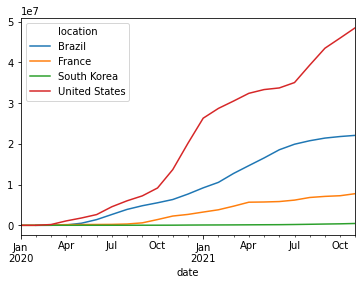

In [114]:
# 그래프로 시각화
ex1.set_index(['date', 'location']).unstack()['total_cases'].plot()

- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기

In [117]:
# 새로운 컬럼 추가하기
# 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기
# apply() 함수를 활용하여 strftime() 함수 적용하기
covid['year'] = covid.date.apply(lambda X: X.strftime('%Y'))
covid['month'] = covid.date.apply(lambda X: X.strftime('%m'))
covid['day'] = covid.date.apply(lambda X: X.strftime('%d'))
covid['weekNumber'] = covid.date.apply(lambda X: X.strftime('%U'))
covid['weekDay'] = covid.date.apply(lambda X: X.strftime('%a'))

In [119]:
# 쿼터(분기) 정보 추가하기
# 분기 정보는 strftime() 함수에서 제공하지 않기 때문에 Pandas에서 제공하는 다른 함수를 사용해서 추가해야 함
# pd.Timestamp(X).quarter 실행
covid['quarter'] = covid.date.apply(lambda X: pd.Timestamp(X).quarter)

In [120]:
covid

,location,date,total_cases,new_cases,year,month,day,weekNumber,weekDay,quarter
17153,Brazil,2020-02-26,1.0,1.0,2020,02,26,08,Wed,1
17154,Brazil,2020-02-27,1.0,0.0,2020,02,27,08,Thu,1
17155,Brazil,2020-02-28,1.0,0.0,2020,02,28,08,Fri,1
17156,Brazil,2020-02-29,2.0,1.0,2020,02,29,08,Sat,1
17157,Brazil,2020-03-01,2.0,0.0,2020,03,01,09,Sun,1
...,...,...,...,...,...,...,...,...,...,...
130755,United States,2021-11-30,48555974.0,117098.0,2021,11,30,48,Tue,4
130756,United States,2021-12-01,48691353.0,135379.0,2021,12,01,48,Wed,4
130757,United States,2021-12-02,48832228.0,140875.0,2021,12,02,48,Thu,4
130758,United States,2021-12-03,48990127.0,157899.0,2021,12,03,48,Fri,4


In [124]:
# 각 나라별로 요일별 신규 확진자 수의 합 구하기
# pivot_table index를 weekDay로 지정
# pivot_table columns를 location로 지정
covid.pivot_table(index = 'weekDay', columns = 'location', aggfunc = 'sum', values = 'new_cases')

location,Brazil,France,South Korea,United States
weekDay,,,,
Fri,3720534.0,1309466.0,78394.0,8840253.0
Mon,1639659.0,545782.0,54627.0,7355686.0
Sat,3317989.0,1278541.0,69097.0,5918238.0
Sun,1896671.0,1195261.0,54480.0,4736265.0
Thu,3900319.0,1456675.0,67847.0,7567309.0
Tue,3547840.0,1214549.0,74447.0,7049819.0
Wed,3965129.0,1372823.0,74141.0,7583569.0


- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기

In [128]:
# pivot_table index를 quarter로 지정
# pivot_table columns를 location로 지정
# quarter만 지정하면 잘못된 결과를 얻을 수 있기 때문에 year을 추가해 주어야 함
covid.pivot_table(index = ['year', 'quarter'], columns = 'location', aggfunc = 'sum', values = 'new_cases')

location         Brazil     France  South Korea  United States
year quarter                                                  
2020 1           5717.0    52281.0       9785.0       192078.0
     2        1396324.0   151114.0       3064.0      2450401.0
     3        3408894.0   401649.0      11039.0      4591902.0
     4        2865038.0  2117888.0      37880.0     12929657.0
2021 1        5072774.0  2027526.0      41870.0     10368902.0
     2        5808394.0  1481057.0      54084.0      3212779.0
     3        2719826.0  1268625.0     156050.0      9757523.0
     4         711174.0   872957.0     159261.0      5547897.0

<AxesSubplot:xlabel='year,quarter'>

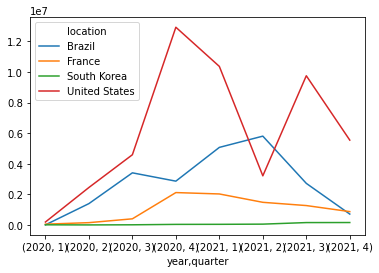

In [129]:
# 데이터 시각화
covid.pivot_table(index = ['year', 'quarter'], columns = 'location', aggfunc = 'sum', values = 'new_cases').plot()